# Seasonal temperature variation at and close to the surface

To optimize the installation and performance of shallow heat exchangers, knowledge of seasonal temperature signals close the surface is desired. The systematic seasonal fluctuation of solar radiation and air temperature imparts a temperature wave to the ground surface that propagates downward into the earth. The temperature at depth oscillates with the same (annual) frequency as the surface temperature, but with an amplitude that
diminishes and a phase lag that increases with depth. Eventually, a point is reached where the temperature remains essentially constant, except for any long-term drift related to climatic changes, for example. This
depth of 'zero' annual amplitude may be 10 to 15 metres in soils, but can be much deeper in rock. 

Before we look at the temperature evolution at depth, we have a look at the mean average air temperatures in Aachen last year (2018). The German weather service "Deutscher Wetterdienst" (DWD) provides climate data of more than 70 observational stations in Germany from the monitoring network with free access. The data has been obtained [here](https://icdc.cen.uni-hamburg.de/1/daten/atmosphere/dwd-station.html) and is given in the CSV file `Temp_Aachen_2018.csv`.

## Task 1): Surface temperatures

Load and visualize the temperature data and approximate its seasonal variation by a cosine function of the following form:

$$T(z=0, t)=T_{mean}+T_{D} \cos (\omega t+\varphi)$$

Here $T_{mean}$ is the average air temperature, $T_{D}$ is the amplitude, $\omega=2\pi/P$ is the angular frequency, where P is the period of the temperature signal (one year), and $\varphi$ is the phase lag.

Estimate the root-mean-square error (RMSE) between observations and their sinusoidal approximation.

### Solution:

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
temp = np.loadtxt("data/temp_aachen_2018.csv", delimiter=",")[:,1]

In [4]:
# Define some helper variables
n = 1000
days = 365
z = np.linspace(0,20, n)
year = np.arange(days)

# Define parameters of function
Tm = np.mean(temp)
Td = 9
omega = 2*np.pi/days
phi = np.pi * 0.85

T_s = Tm + Td * np.cos(omega*year + phi)

# Calculate fit
RMSE = np.sqrt(((T_s - temp)**2).mean())

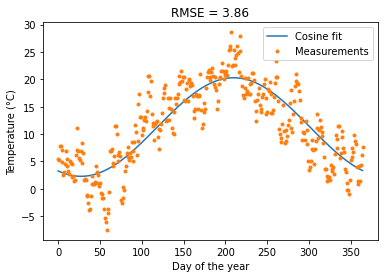

In [5]:
# Visualize result
plt.plot(year, T_s, label="Cosine fit")
plt.plot(year, temp,'.', label="Measurements")
plt.xlabel("Day of the year")
plt.ylabel("Temperature (°C)")
plt.title("RMSE = %.2f" % RMSE)
plt.legend()

## Task 2): Ground temperatures

The temperature at depth $z$ for the temperature variation at the surface $T(z=0, t)$ (calculated in Task 1) is defined as (Carslaw & Jaeger, 1959):

$$T(z, t)= T_{\text {mean}}+ d T / d z \cdot z +T_{D} \exp (-\sqrt{\omega /(2 \kappa)} z) \cos (\omega t-\sqrt{\omega /(2 \kappa)} z+\varphi)$$

Here $d T / d z$ is the average temperature gradient and $\kappa$ is the thermal diffusivity.

Calculate and visualize the temperature profile for the first 20 m of the subsurface using a thermal diffusivity of $0.5 \times 10^{-5}$m$^2$/s for every third month of the year.

### Solution:

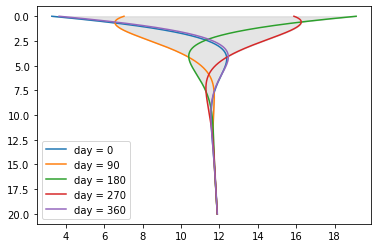

In [6]:
kappa = 0.5e-6 * 60 * 60 * 24
mt = []
fig, ax = plt.subplots()

for t in year[::90]:
    T = Tm + 0.03*z + Td * np.exp(-np.sqrt(omega/(2*kappa)) * z) * np.cos(omega*t - np.sqrt(omega/(2*kappa)) * z + phi)
    mt.append(T)
    ax.plot(T, z, label="day = %d" % t)
    
ax.invert_yaxis()
mt = np.array(mt)
ax.legend()
ax.fill_betweenx(z, np.min(mt, axis=0), np.max(mt, axis=0), alpha=0.1, color="k")

### References
- Carslaw, H. S., and J. C. Jaeger, 1959: Conduction of Heat in Solids.
2nd ed. Oxford University Press, 510 pp.